### Librerias

In [344]:
import pandas as pd
# Configurar el formato de visualización de los números para que no use notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

import numpy as np

#librería para graficar
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


### Análisis Exploratrorio

In [194]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(1600, 12)


,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
0,1648,11,10042,68,35,22609.49,30,66307,8,Grande,2,43747.69
1,1259,3,11909,107,42,24561.99,35,29107,8,Grande,2,37483.69
2,674,13,10669,75,33,38914.22,52,9519,4,Median,3,57523.00
3,1558,7,6981,65,19,39204.97,30,28651,7,Grande,1,50338.06
4,1626,22,10940,74,37,23947.08,46,30654,7,Grande,2,45675.55


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idloc      1600 non-null   int64  
 1   edadloc    1600 non-null   int64  
 2   correo     1600 non-null   int64  
 3   paginas    1600 non-null   int64  
 4   telefono   1600 non-null   int64  
 5   impresa    1600 non-null   float64
 6   servicio   1600 non-null   int64  
 7   nomina     1600 non-null   int64  
 8   idmercado  1600 non-null   int64  
 9   tamamer    1600 non-null   object 
 10  promo      1600 non-null   int64  
 11  ropamujer  1600 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 150.1+ KB


- El df no tiene nulos en ningún campo

In [196]:
#Cambiar el tipo de la variable 'idloc'
df['idloc']=df['idloc'].astype(str)
print(df['idloc'].dtype) #Validamos que el campo ha cambiado

object


In [197]:
#Agrupamos VARIABLES 
var_cat=['tamamer','idloc','promo', 'idmercado' ]
var_num=[ 'edadloc', 'correo', 'paginas', 'telefono', 'impresa',
       'servicio', 'nomina']
target=['ropamujer']

### Análisis Univariado

#### Variables numéricas

In [298]:
df[var_num+target].describe(percentiles=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9]).transpose()

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,max
edadloc,1600.00,10.47,7.39,1.00,2.00,3.00,4.00,4.00,7.00,9.00,11.00,15.00,17.00,19.00,22.00,25.00
correo,1600.00,10598.68,2400.67,1147.00,8951.10,9480.60,9644.25,9792.70,10119.20,10480.00,10824.20,11298.20,11763.50,12472.20,13769.20,15259.00
paginas,1600.00,85.04,15.94,51.00,64.00,72.00,74.00,76.00,80.00,84.00,88.00,95.00,98.00,101.00,108.00,114.00
telefono,1600.00,37.64,9.75,17.00,28.00,30.00,30.00,32.00,34.00,36.00,38.00,41.00,43.00,47.00,53.00,59.00
impresa,1600.00,28834.62,6251.17,18061.20,20112.69,22553.00,23562.32,24705.77,26705.30,28734.79,30820.80,32803.34,34022.99,35252.42,37732.25,40027.78
servicio,1600.00,43.65,13.24,15.00,28.00,31.00,33.00,35.00,39.00,43.00,47.00,52.00,54.00,57.00,62.00,68.00
nomina,1600.00,24104.13,18217.35,901.00,6642.00,9406.40,10680.50,11855.00,15501.40,18886.50,23020.80,28316.90,31637.25,36236.80,49142.40,135882.00
ropamujer,1600.00,50978.38,17558.26,1289.24,28665.54,35872.34,38478.32,40726.77,45139.07,49968.34,54735.58,59955.09,63255.20,65599.89,74067.66,117709.26


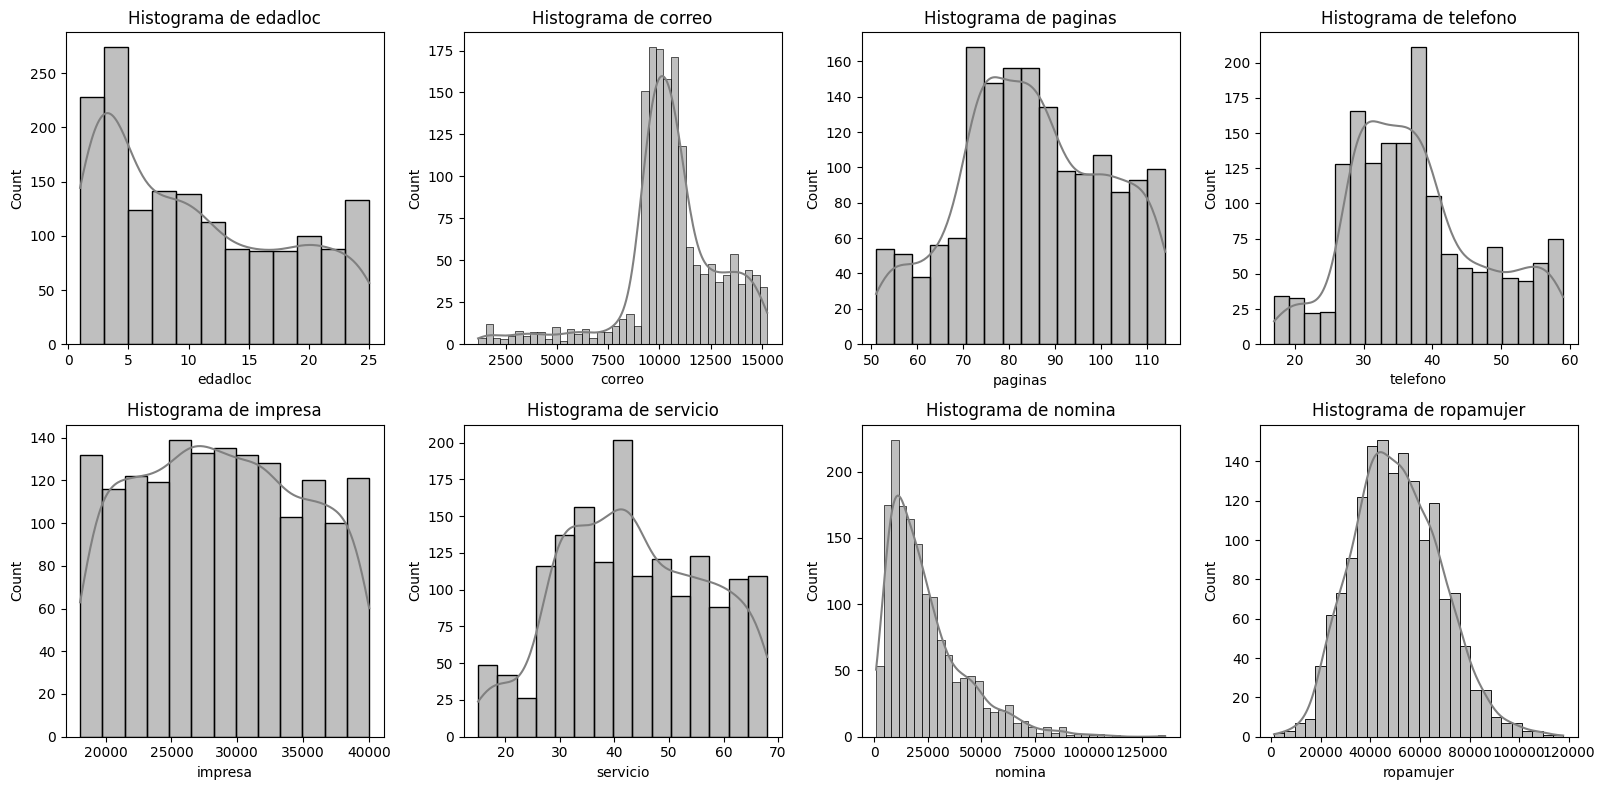

In [199]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 8))

# Definir el número de filas y columnas para los subplots
num_rows = 2
num_cols = 4

# Crear subplots
for i, col in enumerate(df[var_num+target].columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df[col], kde=True, color='grey')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


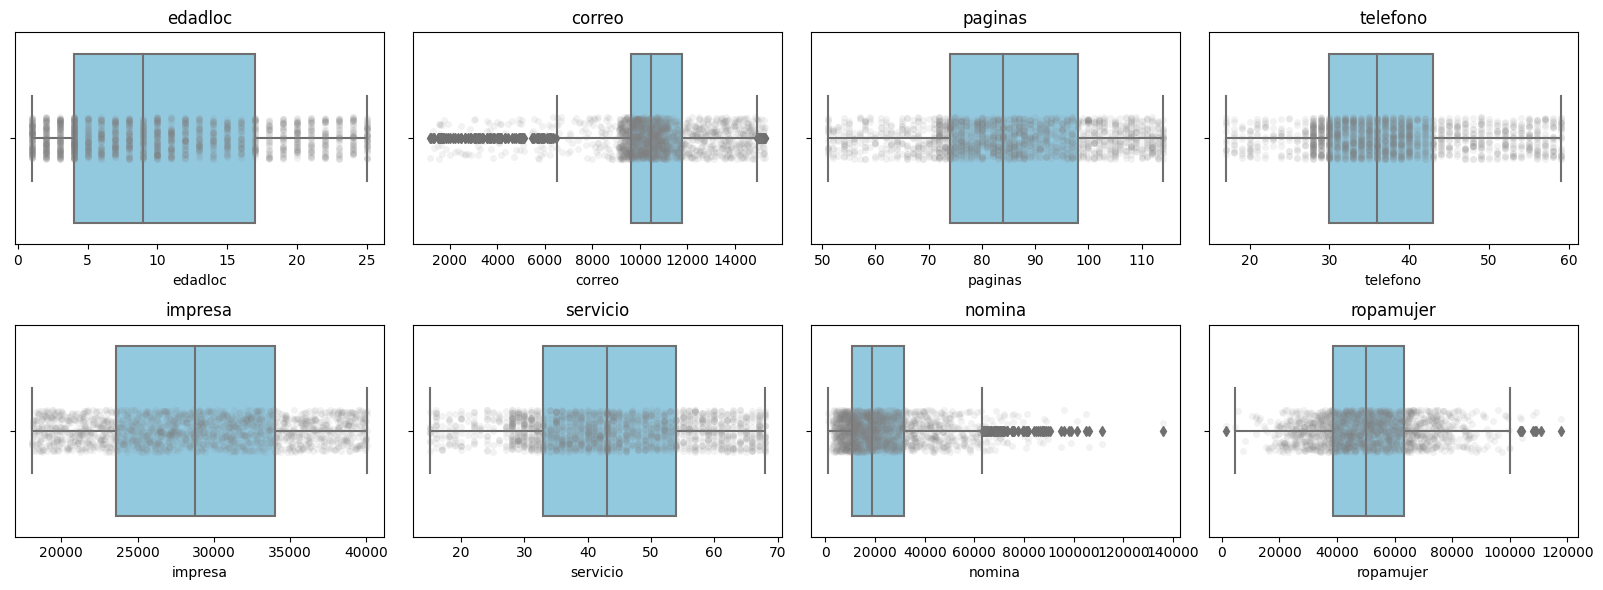

In [200]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 6))

# Definir el número de filas y columnas para los subplots
num_rows = 2
num_cols = 4

# Crear subplots
for i, col in enumerate(df[var_num+target].columns):
    plt.subplot(num_rows, num_cols, i+1)
    
    # Boxplot con color personalizado (azul claro)
    sns.boxplot(x=df[col], color='#87CEEB')  # Código hexadecimal de color azul claro
    # Agregar los puntos de distribución al costado
    sns.stripplot(x=df[col], color='gray', jitter=0.1, alpha=0.1)

    plt.title(f'{col}')
    plt.xlabel(col)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Las variables numéricas tienen una distribución regular a excepción de la variable correo y nómina, donde la primera tiene un sesgo  a la izquierda y la segunda tiene un sesgo a la derecha, teniendo así unos outliers pero no son de gravedad.

#### Variables categóricas

**idloc**

In [201]:
unicos=df.idloc.nunique()
print(f'Existen {unicos} valores únicos en idloc')
df.idloc.value_counts()

Existen 1600 valores únicos en idloc


idloc
1648    1
1323    1
1617    1
49      1
839     1
       ..
129     1
1364    1
691     1
1661    1
1655    1
Name: count, Length: 1600, dtype: int64

**promo**

In [202]:
unicos=df.promo.nunique()
print(f'Existen {unicos} valores únicos en promo')
df.promo.value_counts()

Existen 3 valores únicos en promo


promo
2    701
1    468
3    431
Name: count, dtype: int64

**idmercado**

In [203]:
unicos=df.idmercado.nunique()
print(f'Existen {unicos} valores únicos en idmercado')
df.idmercado.value_counts()

Existen 9 valores únicos en idmercado


idmercado
3    209
9    186
1    185
5    178
2    177
8    171
4    170
6    166
7    158
Name: count, dtype: int64

**tamamer**

In [204]:
unicos=df.tamamer.nunique()
print(f'Existen {unicos} valores únicos en tamamer')
df.tamamer.value_counts()


Existen 3 valores únicos en tamamer


tamamer
Median     569
Grande     539
Pequeño    492
Name: count, dtype: int64

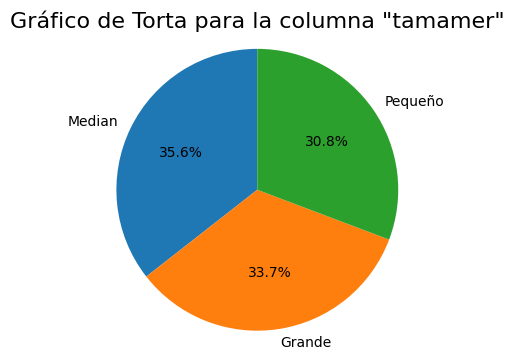

In [205]:
# Crear un gráfico de torta
plt.figure(figsize=(4, 4))  # Tamaño de la figura (opcional)
plt.pie(df['tamamer'].value_counts(), labels=df['tamamer'].value_counts().index, autopct='%1.1f%%', startangle=90)

# Configuración de etiquetas y título
plt.axis('equal')  # Hace que el gráfico de torta tenga un aspecto circular
plt.title('Gráfico de Torta para la columna "tamamer"', fontsize=16)

# Mostrar el gráfico
plt.show()

### Análisis Bivariado

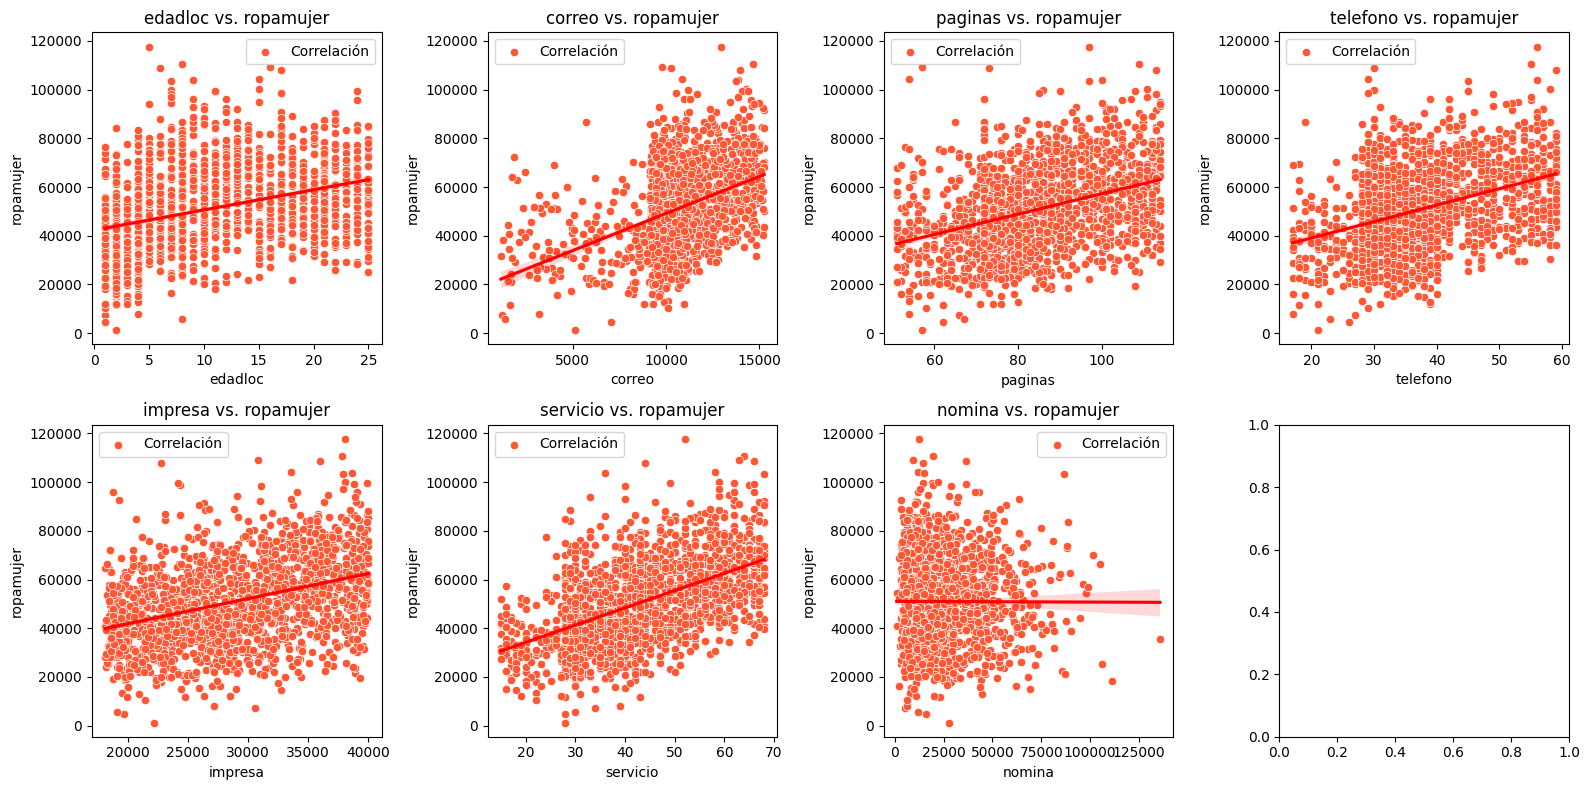

In [206]:
# Crear una figura con subplots organizados en una cuadrícula de 4 columnas y 2 filas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Aplanar la matriz de subplots para facilitar la iteración
axes = axes.flatten()

# Iterar a través de las columnas en var_num y crear gráficos de dispersión con colores diferentes
for i, var in enumerate(var_num):
    sns.scatterplot(data=df, x=var, y=target[0], ax=axes[i], color="#FF5733")
    axes[i].set_title(f'{var} vs. {target[0]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target[0])

        # Calcular la correlación entre var y target
    corr_coeff = df[var].corr(df[target[0]])
    
    # Agregar una línea de correlación al gráfico
    sns.regplot(data=df, x=var, y=target[0], ax=axes[i], scatter=False, color='red', line_kws={'label': f'Corr: {corr_coeff:.2f}'})
    axes[i].legend(['Correlación'])

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()
plt.show()

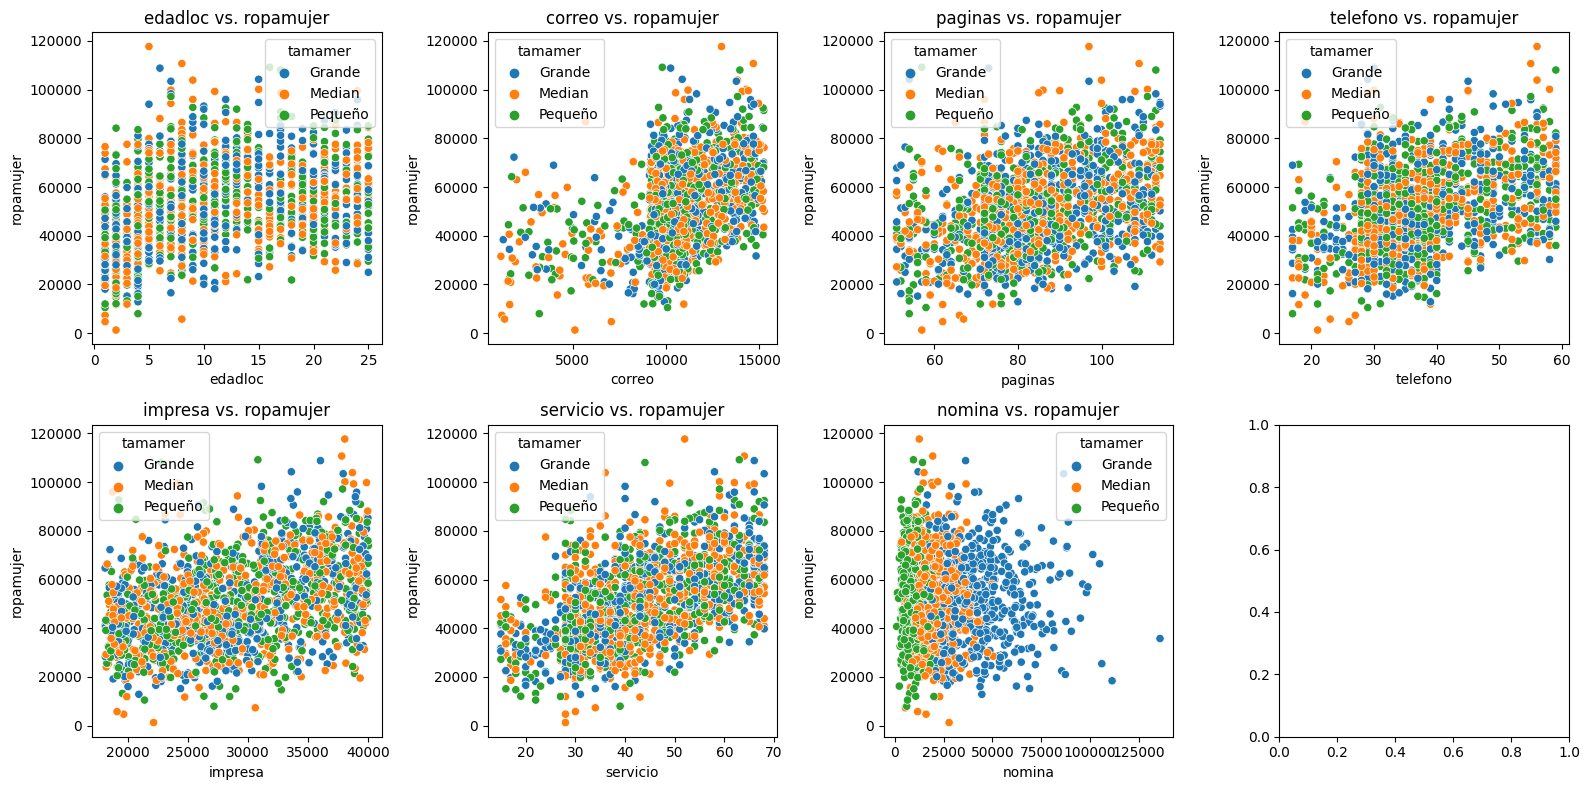

In [207]:
# Crear una figura con subplots organizados en una cuadrícula de 4 columnas y 2 filas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Aplanar la matriz de subplots para facilitar la iteración
axes = axes.flatten()

# Iterar a través de las columnas en var_num y crear gráficos de dispersión con colores diferentes
for i, var in enumerate(var_num):
    sns.scatterplot(data=df, x=var, y=target[0], ax=axes[i], hue='tamamer')
    axes[i].set_title(f'{var} vs. {target[0]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target[0])

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()
plt.show()

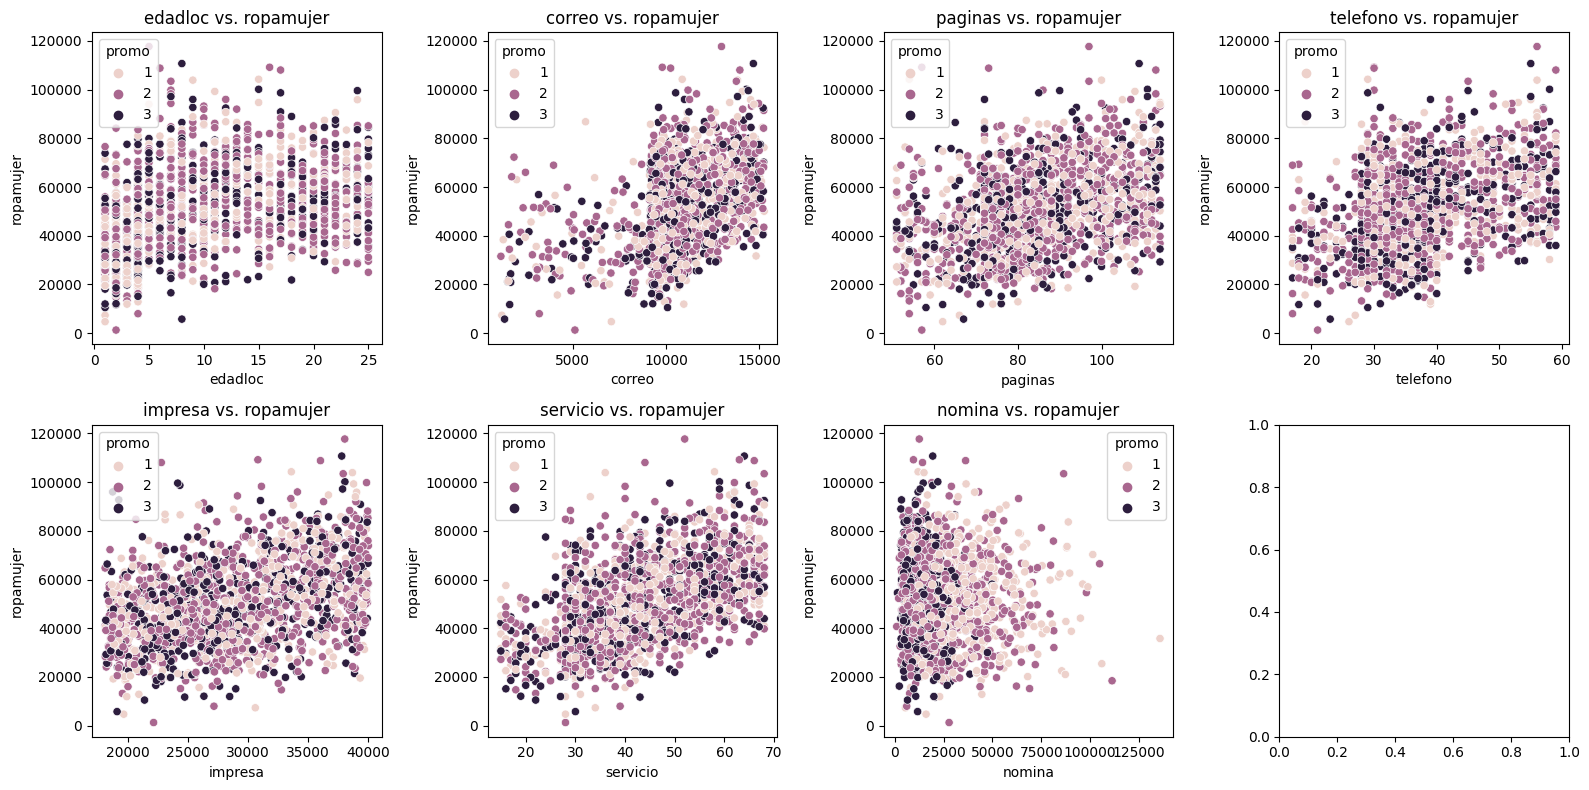

In [208]:
# Crear una figura con subplots organizados en una cuadrícula de 4 columnas y 2 filas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Aplanar la matriz de subplots para facilitar la iteración
axes = axes.flatten()

# Iterar a través de las columnas en var_num y crear gráficos de dispersión con colores diferentes
for i, var in enumerate(var_num):
    sns.scatterplot(data=df, x=var, y=target[0], ax=axes[i], hue='promo')
    axes[i].set_title(f'{var} vs. {target[0]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target[0])

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()
plt.show()

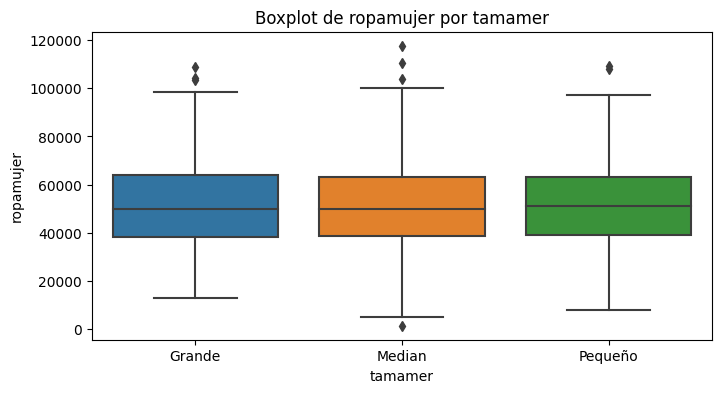

In [209]:
# Crear un gráfico de boxplot con la variable objetivo y la variable categórica
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Utiliza sns.boxplot con la variable categórica en el eje x y la variable objetivo en el eje y
sns.boxplot(data=df, x='tamamer', y=target[0])

# Agrega etiquetas y título
plt.xlabel('tamamer')
plt.ylabel(target[0])
plt.title(f'Boxplot de {target[0]} por tamamer')

# Muestra el gráfico
plt.show()

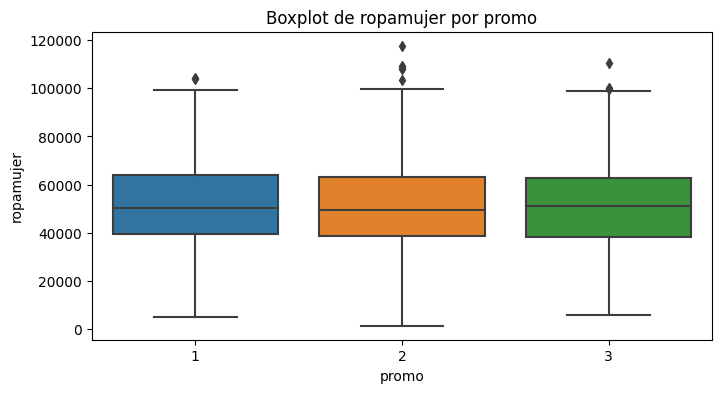

In [210]:
# Crear un gráfico de boxplot con la variable objetivo y la variable categórica
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Utiliza sns.boxplot con la variable categórica en el eje x y la variable objetivo en el eje y
sns.boxplot(data=df, x='promo', y=target[0])

# Agrega etiquetas y título
plt.xlabel('promo')
plt.ylabel(target[0])
plt.title(f'Boxplot de {target[0]} por promo')

# Muestra el gráfico
plt.show()

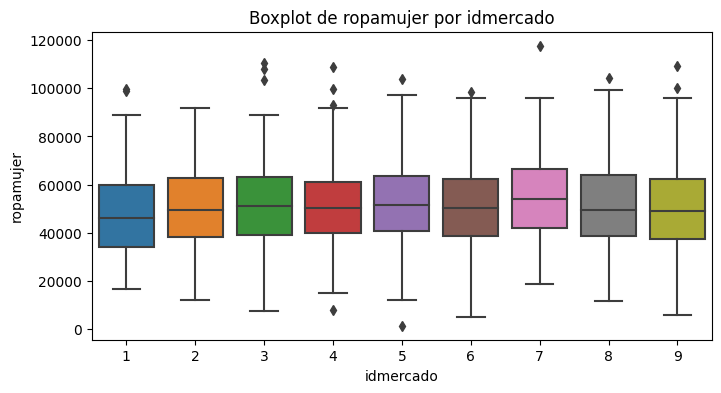

In [211]:
# Crear un gráfico de boxplot con la variable objetivo y la variable categórica
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Utiliza sns.boxplot con la variable categórica en el eje x y la variable objetivo en el eje y
sns.boxplot(data=df, x='idmercado', y=target[0])

# Agrega etiquetas y título
plt.xlabel('idmercado')
plt.ylabel(target[0])
plt.title(f'Boxplot de {target[0]} por idmercado')

# Muestra el gráfico
plt.show()

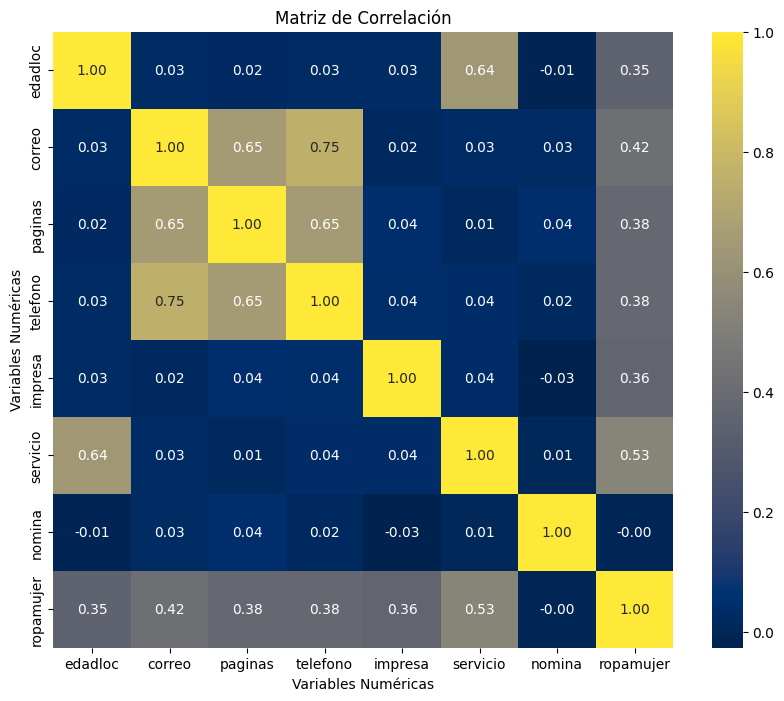

In [212]:
# Calcula la matriz de correlación
correlation_matrix = df[var_num+target].corr()

# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")

# Agrega etiquetas y título
plt.xlabel('Variables Numéricas')
plt.ylabel('Variables Numéricas')
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()

**Conclusiones del EDA**

- No existen valores nulos en la data.
- La distribución de la variable objetivo es similar a una normal.
- Las variables numéricas tienen una distribución regular a excepción de la variable correo y nómina, donde la primera tiene un sesgo  a la izquierda y la segunda tiene un sesgo a la derecha, teniendo así unos outliers pero no son de gravedad.
- La variable que más se correlaciona con el target es la variable servicio.
- Las variables telefono, correo y las variables páginas, correo tienen alta correlación entre sí. Al parecer se debe eliminar la variable correo.
- No existe correlación entre nómina y la variable target.

### Preprocesamiento para el modelo

#### Dummyzar Variables

In [213]:
# Usar la función get_dummies para crear variables dummy
df= pd.get_dummies(df, columns=['idmercado','promo'], dtype=int)

In [218]:
# Mapear las subcategorías a valores numéricos
mapeo = {'Pequeño': 1, 'Median': 2, 'Grande': 3}
df['ord_tamamer'] = df['tamamer'].map(mapeo)
df.head()

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,tamamer,ropamujer,...,idmercado_4,idmercado_5,idmercado_6,idmercado_7,idmercado_8,idmercado_9,promo_1,promo_2,promo_3,ord_tamamer
0,1648,11,10042,68,35,22609.49,30,66307,Grande,43747.69,...,0,0,0,0,1,0,0,1,0,3
1,1259,3,11909,107,42,24561.99,35,29107,Grande,37483.69,...,0,0,0,0,1,0,0,1,0,3
2,674,13,10669,75,33,38914.22,52,9519,Median,57523.00,...,1,0,0,0,0,0,0,0,1,2
3,1558,7,6981,65,19,39204.97,30,28651,Grande,50338.06,...,0,0,0,1,0,0,1,0,0,3
4,1626,22,10940,74,37,23947.08,46,30654,Grande,45675.55,...,0,0,0,1,0,0,0,1,0,3


#### Selección de variables

In [219]:
df.columns

Index(['idloc', 'edadloc', 'correo', 'paginas', 'telefono', 'impresa',
       'servicio', 'nomina', 'tamamer', 'ropamujer', 'idmercado_1',
       'idmercado_2', 'idmercado_3', 'idmercado_4', 'idmercado_5',
       'idmercado_6', 'idmercado_7', 'idmercado_8', 'idmercado_9', 'promo_1',
       'promo_2', 'promo_3', 'ord_tamamer'],
      dtype='object')

In [337]:
data=df.copy()
data=data[[
    #'idloc', 
    #'edadloc', 
    'correo', 
    'paginas', 
    #'telefono', 
    'impresa',
    'servicio',
    #'nomina', 
    #'tamamer', 
    'ropamujer', 
    #'idmercado_1',
    #'idmercado_2', 
    #'idmercado_3', 
    #'idmercado_4', 
    #'idmercado_5',
    #'idmercado_6', 
    #'idmercado_7', 
    #'idmercado_8', 
    #'idmercado_9', 
    #'promo_1',
    #'promo_2', 
    #'promo_3', 
    #'ord_tamamer'   
]]

**Análisis VIF**

In [338]:
col_drop=['ropamujer']
# Separar las variables independientes en 'X'
X = data.drop(col_drop, axis=1)

# Calcular el VIF para cada variable independiente
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,correo,34.79
1,paginas,43.14
2,impresa,15.46
3,servicio,10.06


### Modelo

#### Regresión Lineal Múltiple

In [339]:
# Supongamos que quieres predecir 'variable_objetivo' en función de 'caracteristicas'
X = data.drop('ropamujer',axis=1)
y = data['ropamujer']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal y ajústalo a tus datos de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Haz predicciones utilizando el modelo entrenado en tus datos de prueba
y_pred = modelo.predict(X_test)

# Evalúa el rendimiento del modelo utilizando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"Error cuadrático medio: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio: 116696208.07743454
Root Mean Squared Error (RMSE): 10802.601912383634
Coeficiente de determinación (R^2): 0.5828323215122391


In [340]:
# Obtén los coeficientes de la regresión
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")

Coeficientes: [  2.14493341 178.10765942   0.96546629 689.63702035]
Intercepto: -44675.11472320111


#### Random Forest

In [361]:
data=df.copy()
data=data[[
    #'idloc', 
    'edadloc', 
    'correo', 
    'paginas', 
    'telefono', 
    'impresa',
    'servicio',
    'nomina', 
    #'tamamer', 
    'ropamujer', 
    #'idmercado_1',
    #'idmercado_2', 
    #'idmercado_3', 
    #'idmercado_4', 
    #'idmercado_5',
    #'idmercado_6', 
    #'idmercado_7', 
    #'idmercado_8', 
    #'idmercado_9', 
    #'promo_1',
    #'promo_2', 
    #'promo_3', 
    'ord_tamamer'   
]]

In [365]:
# Supongamos que quieres predecir 'variable_objetivo' en función de 'caracteristicas'
X = data.drop('ropamujer',axis=1)
y = data['ropamujer']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de Regresión con Random Forest y ajústalo a tus datos de entrenamiento
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Haz predicciones utilizando el modelo entrenado en tus datos de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Calcula el RMSE 
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf}")


Root Mean Squared Error (RMSE) - Random Forest: 10847.742112485403


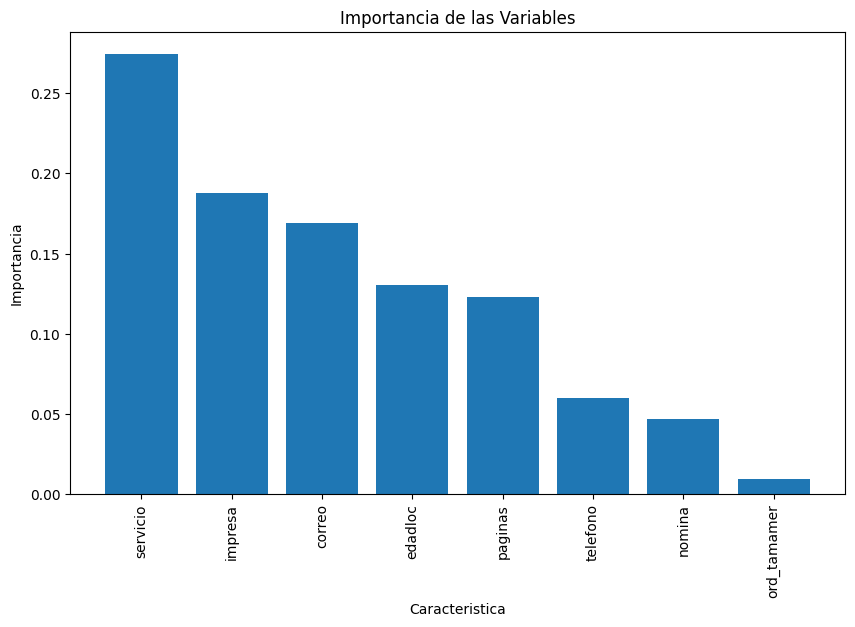

  Caracteristica  Importancia
5       servicio         0.27
4        impresa         0.19
1         correo         0.17
0        edadloc         0.13
2        paginas         0.12
3       telefono         0.06
6         nomina         0.05
7    ord_tamamer         0.01


In [363]:
# Obtén la importancia de las variables
importancias_variables = modelo_rf.feature_importances_

# Crea un DataFrame para mostrar las importancias junto con el nombre de las características
df_importancias = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': importancias_variables})

# Ordena las importancias de manera descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Crea un gráfico de barras para visualizar las importancias
plt.figure(figsize=(10, 6))
plt.bar(df_importancias['Caracteristica'], df_importancias['Importancia'])
plt.xlabel('Caracteristica')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables')
plt.xticks(rotation=90)
plt.show()

# Imprime las importancias en la consola
print(df_importancias)

### Conclusión

- Se aplicó modelo de Regresión Lineal Múltiple y Random Forest: Se encontró en ambas que el RMSE más aceptable ronda los 10 000 pesos. 
